___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# from scipy.stats import zscore
# from scipy import stats
# from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [5]:
df0 = pd.read_csv("treetypes.csv")
df = df0.copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [6]:
pd.options.display.float_format = '{:,.10f}'.format

In [7]:
# df.info()
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Elevation,"250,000.0000000000","2,748.5051600000",418.3009745102,"1,859.0000000000","2,375.0000000000","2,753.0000000000","3,108.0000000000","3,857.0000000000"
Aspect,"250,000.0000000000",156.2121720000,109.6528467575,0.0000000000,65.0000000000,125.0000000000,260.0000000000,360.0000000000
Slope,"250,000.0000000000",16.3310520000,8.3174903244,0.0000000000,10.0000000000,15.0000000000,22.0000000000,65.0000000000
Horizontal_Distance_To_Hydrology,"250,000.0000000000",228.0940320000,209.6301534827,0.0000000000,66.0000000000,180.0000000000,330.0000000000,"1,390.0000000000"
Vertical_Distance_To_Hydrology,"250,000.0000000000",50.8978200000,61.0069671648,-163.0000000000,5.0000000000,32.0000000000,79.0000000000,598.0000000000
Horizontal_Distance_To_Roadways,"250,000.0000000000","1,719.9665760000","1,330.8176026101",0.0000000000,756.0000000000,"1,318.0000000000","2,294.0000000000","7,112.0000000000"
Hillshade_9am,"250,000.0000000000",212.3704880000,30.6545824544,0.0000000000,195.0000000000,220.0000000000,235.0000000000,254.0000000000
Hillshade_Noon,"250,000.0000000000",218.5107000000,22.6809470528,0.0000000000,206.0000000000,222.0000000000,235.0000000000,254.0000000000
Hillshade_3pm,"250,000.0000000000",134.5027640000,46.0338918280,0.0000000000,106.0000000000,137.0000000000,167.0000000000,252.0000000000
Horizontal_Distance_To_Fire_Points,"250,000.0000000000","1,521.7569040000","1,107.3783730901",0.0000000000,734.0000000000,"1,273.0000000000","1,998.0000000000","7,150.0000000000"


In [8]:
len(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'])

10

In [9]:
%matplotlip inline

UsageError: Line magic function `%matplotlip` not found.


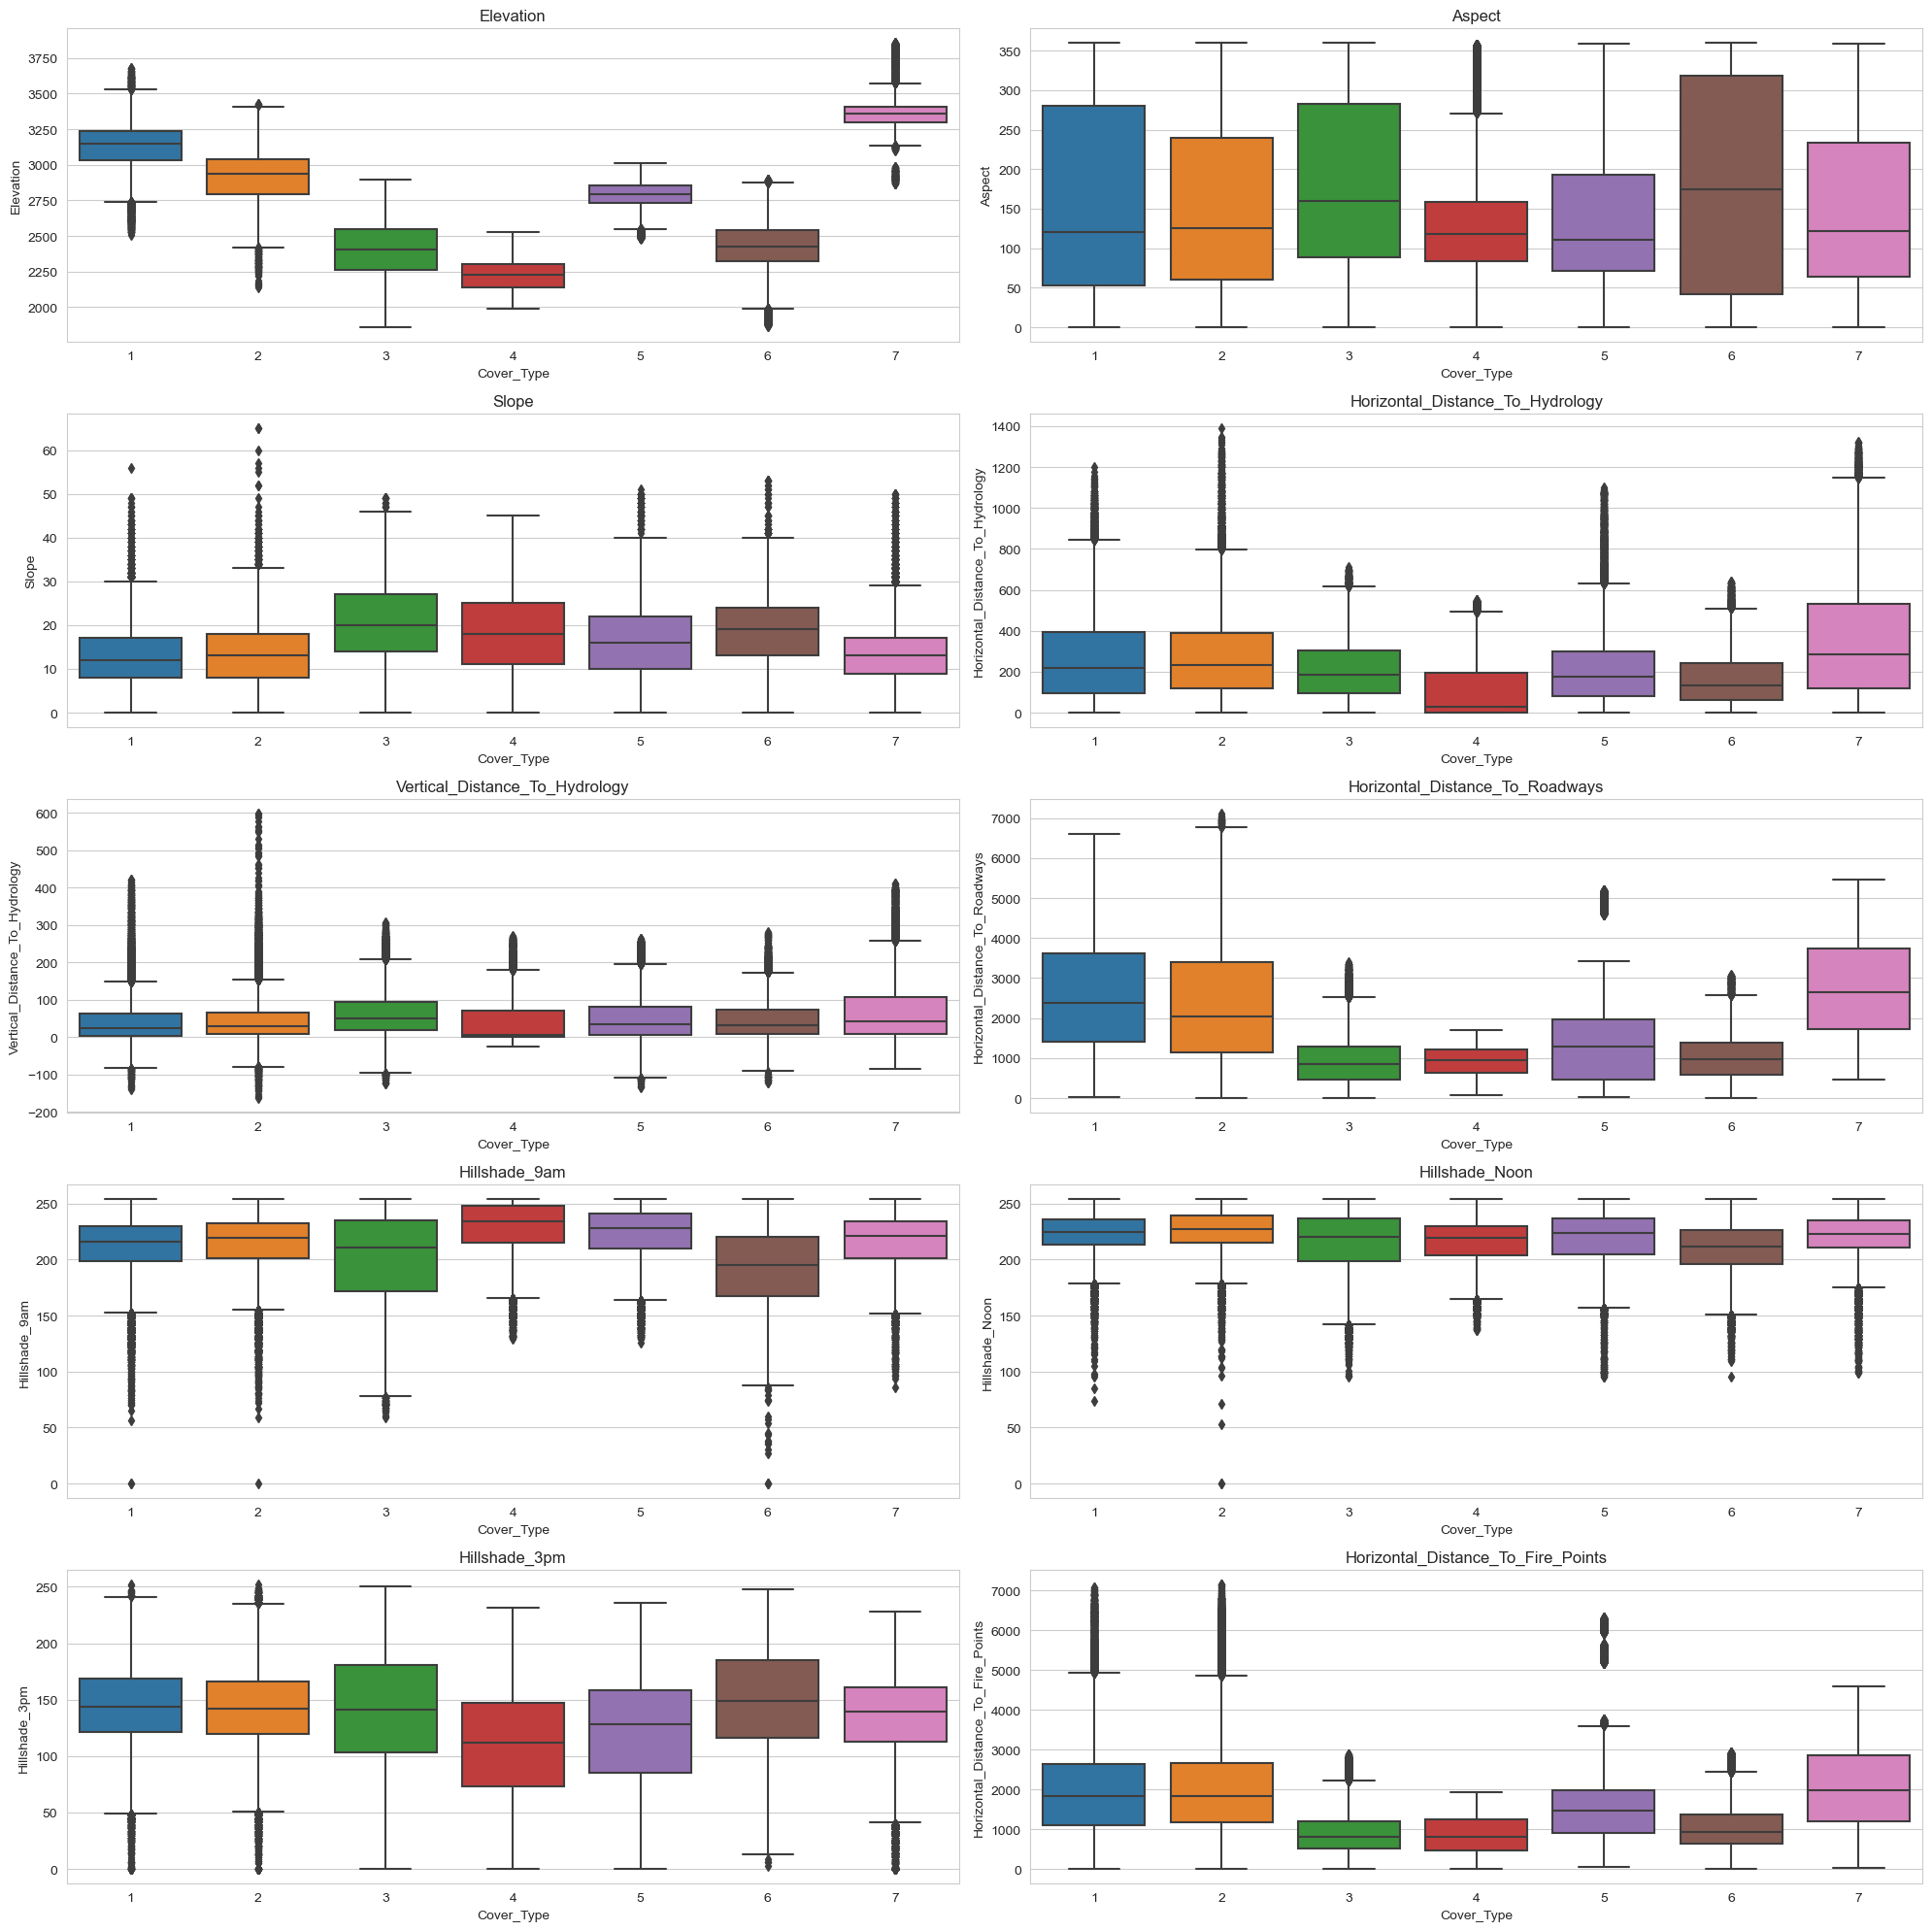

In [10]:
plt.figure(figsize=(20,20))
for i,col in enumerate(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],1):
    plt.subplot(5,2,i)
    # print("-----------",i,"--",col,"---------------")
    plt.title(col)
    sns.boxplot(y=df[col], x=df["Cover_Type"])
    plt.tight_layout();
plt.show()
    

In [11]:
for col in df.columns:
    print(f"Column {col:<35} has ---> {df[col].nunique():<6} unique values")

Column Elevation                           has ---> 1983   unique values
Column Aspect                              has ---> 361    unique values
Column Slope                               has ---> 59     unique values
Column Horizontal_Distance_To_Hydrology    has ---> 1294   unique values
Column Vertical_Distance_To_Hydrology      has ---> 578    unique values
Column Horizontal_Distance_To_Roadways     has ---> 6501   unique values
Column Hillshade_9am                       has ---> 207    unique values
Column Hillshade_Noon                      has ---> 165    unique values
Column Hillshade_3pm                       has ---> 253    unique values
Column Horizontal_Distance_To_Fire_Points  has ---> 6487   unique values
Column Wilderness_Area_1                   has ---> 2      unique values
Column Wilderness_Area_2                   has ---> 2      unique values
Column Wilderness_Area_3                   has ---> 2      unique values
Column Wilderness_Area_4                   has --->

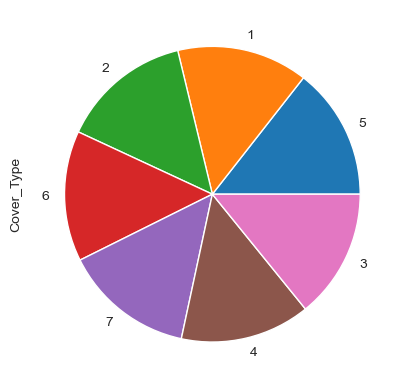

In [12]:
df.Cover_Type.value_counts().plot.pie()
plt.show()

In [13]:
lst = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [14]:
df = df[~df.duplicated()]


In [15]:
df1 = df.copy()

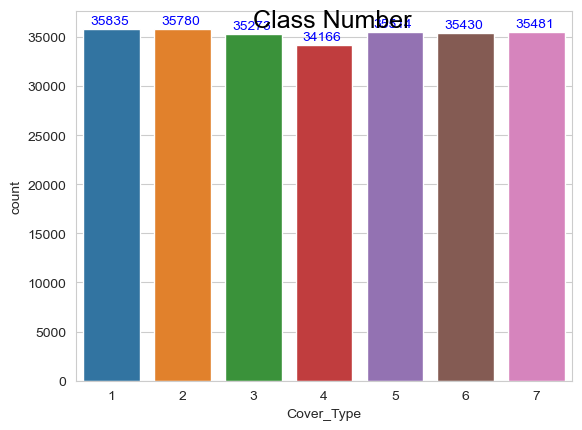

In [16]:
sns.countplot(df1.Cover_Type);
for i,val in enumerate(df1["Cover_Type"].value_counts().sort_index().to_list()):
    plt.text(i-.3,val+500,str(val),color="blue")
    # print(i,val)
plt.text(2,36000,"Class Number",fontdict={"color":"Black","fontsize":18})
plt.show()

In [17]:
df1.Cover_Type.value_counts(1).sort_index()

1   0.1448001649
2   0.1445779238
3   0.1425292651
4   0.1380561583
5   0.1435030851
6   0.1431636624
7   0.1433697405
Name: Cover_Type, dtype: float64

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [18]:
df1.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [19]:
df["Soil_Type_Cat"] = 0
k= 1
for i in df.columns[14:-2]:
    #print(i)
    df["Soil_Type_Cat"] += df[i] * k
    k += 1

In [20]:
df.Soil_Type_Cat = df.Soil_Type_Cat.apply(lambda x: str(x))

In [21]:
df["Wilderness_Area_Cat"] = 0
k= 1
for i in df.columns[10:14]:
    #print(i)
    df["Wilderness_Area_Cat"] += df[i] * k
    k += 1

In [22]:
df.Wilderness_Area_Cat = df.Wilderness_Area_Cat.apply(lambda x: str(x))

### Deal with Outliers

#### *ii. Drop Outliers*

### Now, let's take a closer look at correlation of continuous columns.

***
***

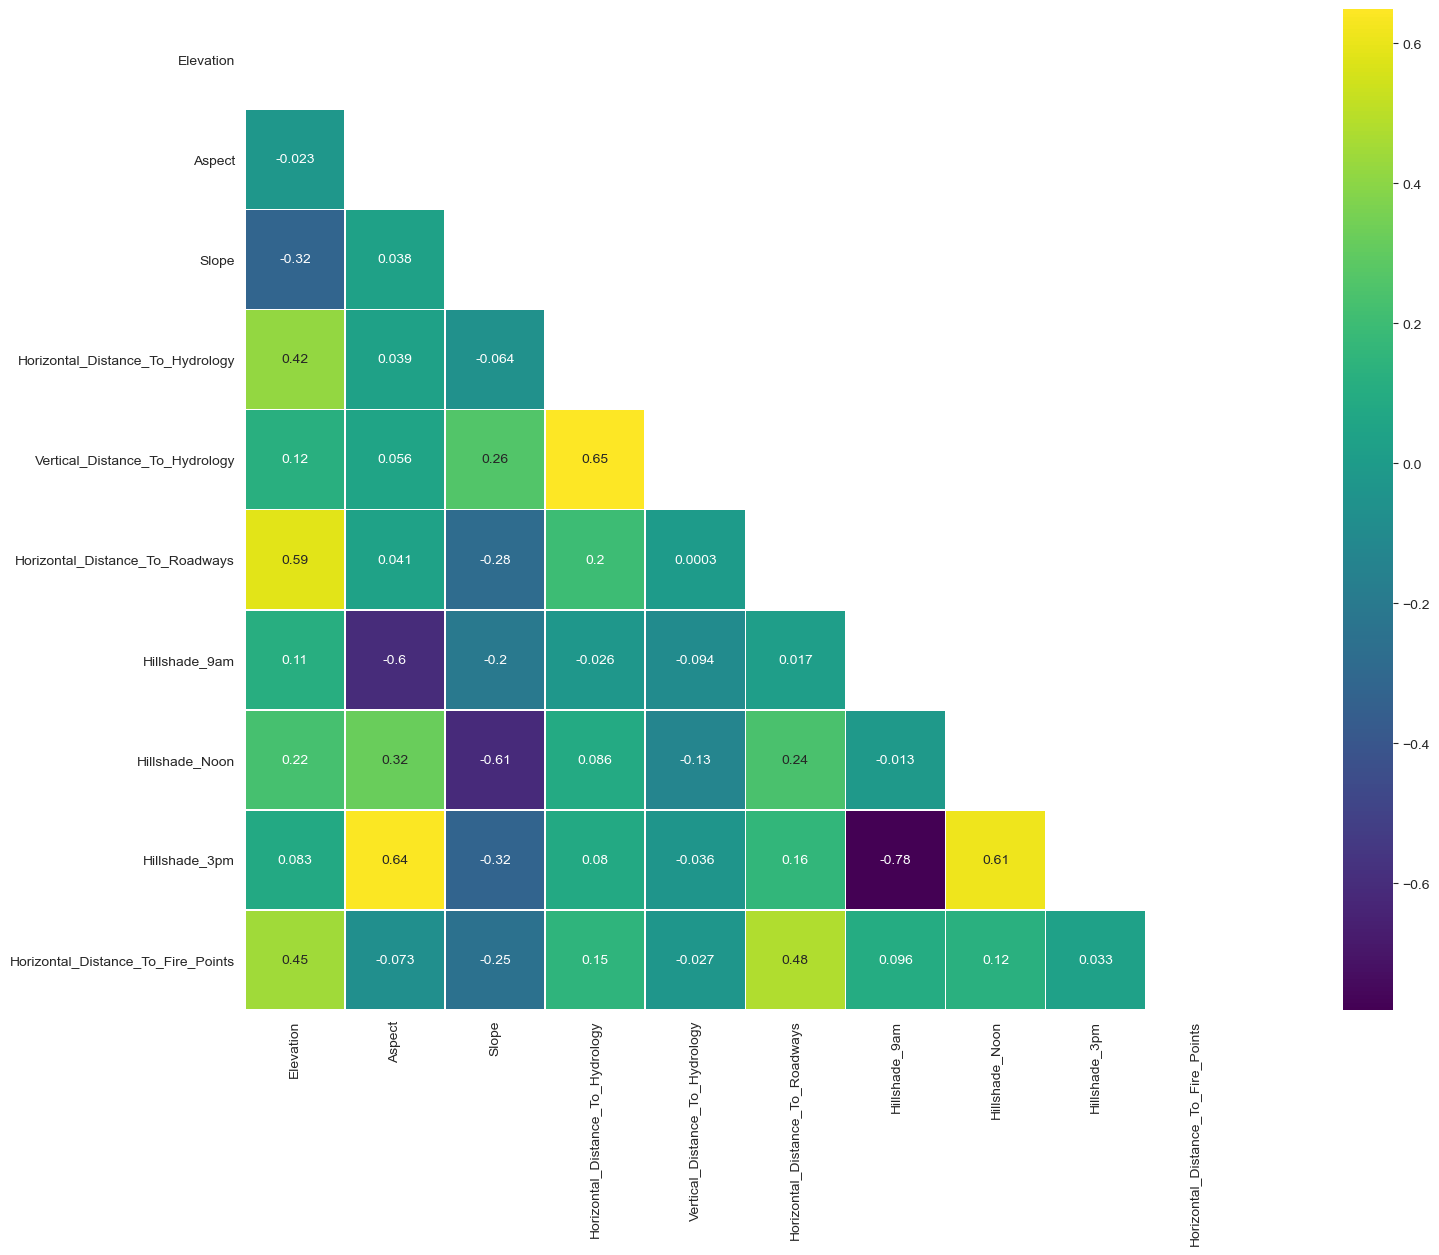

In [23]:
corr = df1[lst].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(25, 13))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5)
plt.show()

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [24]:
df1["hypo_distance"] = (df1["Horizontal_Distance_To_Hydrology"]**2 + df1["Vertical_Distance_To_Hydrology"]**2)**.5
df1["Average_Dist_Road_Hydro"] = (df1.Horizontal_Distance_To_Hydrology + df1.Horizontal_Distance_To_Roadways)/2 
df1["Average_Elevation_Hydro"] = (df1.Elevation + df1.Vertical_Distance_To_Hydrology) /2

In [25]:
df["hypo_distance"] = (df["Horizontal_Distance_To_Hydrology"]**2 + df["Vertical_Distance_To_Hydrology"]**2)**.5
df["Average_Dist_Road_Hydro"] = (df.Horizontal_Distance_To_Hydrology + df.Horizontal_Distance_To_Roadways)/2 
df["Average_Elevation_Hydro"] = (df.Elevation + df.Vertical_Distance_To_Hydrology) /2

In [26]:
df1.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [27]:
df.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [28]:
# df1= df1.drop(["Hillshade_9am"], axis=1)

In [29]:
numeric_cols = [ col for col in df1.columns if df1[col].nunique() > 7]
numeric_cols

['Aspect',
 'Slope',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'hypo_distance',
 'Average_Dist_Road_Hydro',
 'Average_Elevation_Hydro']

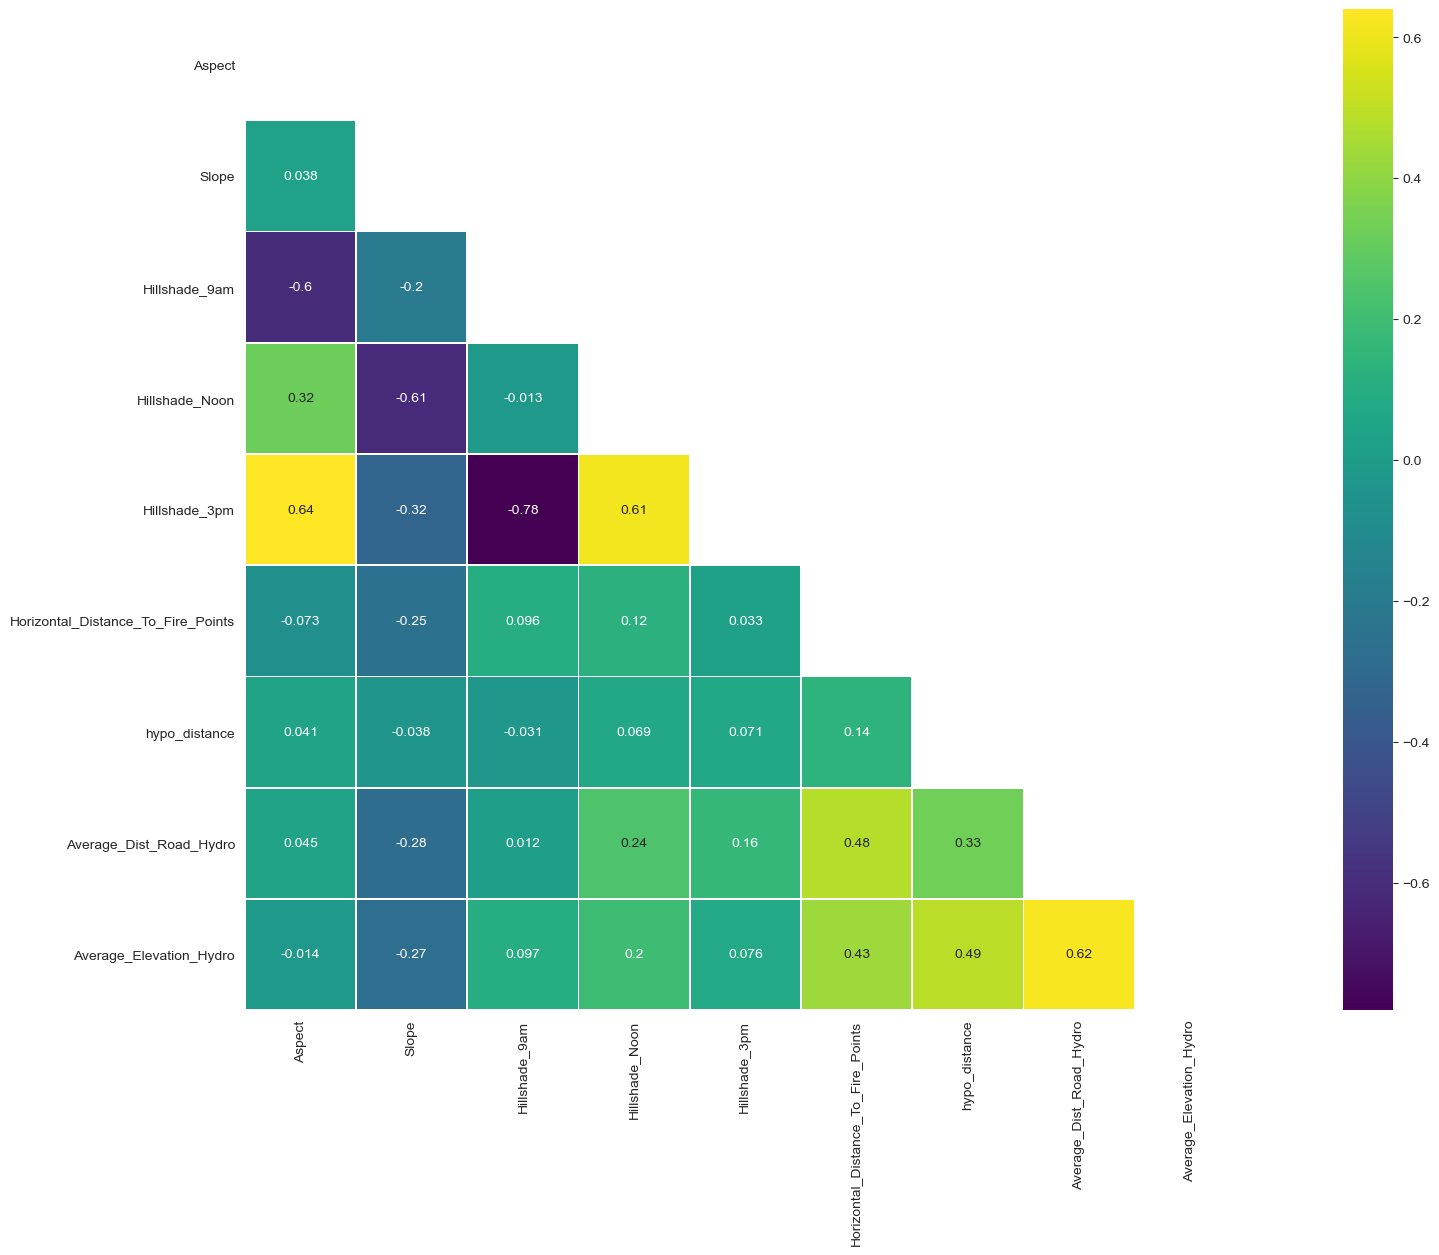

In [30]:

corr = df1[numeric_cols].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(25, 13))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5)
plt.show()

In [31]:
df

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,...,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Soil_Type_Cat,Wilderness_Area_Cat,hypo_distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,123,10,237,231,123,2113,0,0,1,0,...,0,0,0,0,6,10,3,217.3660507071,"1,228.5000000000","1,372.0000000000"
1,110,19,249,216,88,3960,1,0,0,0,...,0,1,0,0,1,38,1,139.8427688513,"1,934.0000000000","1,654.5000000000"
2,322,18,170,217,185,1330,1,0,0,0,...,0,1,0,0,7,38,1,361.2921255715,"2,357.5000000000","1,693.5000000000"
3,89,31,248,173,29,889,0,0,1,0,...,0,0,0,0,5,13,3,321.7530108639,795.0000000000,"1,511.0000000000"
4,93,12,239,221,110,945,0,0,1,0,...,0,0,0,0,7,31,3,520.5506699640,538.5000000000,"1,683.0000000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,339,39,107,151,162,435,0,0,0,1,...,0,0,0,0,3,10,4,51.8652099196,258.0000000000,"1,064.5000000000"
249996,90,31,248,172,27,508,0,0,1,0,...,0,0,0,0,5,13,3,290.8779812911,"1,139.0000000000","1,509.5000000000"
249997,57,5,224,228,139,387,0,0,0,1,...,0,0,0,0,4,6,4,0.0000000000,714.5000000000,"1,168.0000000000"
249998,181,10,223,246,156,1007,0,0,1,0,...,0,0,0,0,5,0,3,0.0000000000,674.5000000000,"1,281.5000000000"


In [32]:
df.drop(df.columns[6:-6],axis=1,inplace=True)

In [33]:
df = df.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,6]]

In [34]:
df

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type_Cat,Wilderness_Area_Cat,hypo_distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro,Cover_Type
0,123,10,237,231,123,2113,10,3,217.3660507071,"1,228.5000000000","1,372.0000000000",6
1,110,19,249,216,88,3960,38,1,139.8427688513,"1,934.0000000000","1,654.5000000000",1
2,322,18,170,217,185,1330,38,1,361.2921255715,"2,357.5000000000","1,693.5000000000",7
3,89,31,248,173,29,889,13,3,321.7530108639,795.0000000000,"1,511.0000000000",5
4,93,12,239,221,110,945,31,3,520.5506699640,538.5000000000,"1,683.0000000000",7
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,339,39,107,151,162,435,10,4,51.8652099196,258.0000000000,"1,064.5000000000",3
249996,90,31,248,172,27,508,13,3,290.8779812911,"1,139.0000000000","1,509.5000000000",5
249997,57,5,224,228,139,387,6,4,0.0000000000,714.5000000000,"1,168.0000000000",4
249998,181,10,223,246,156,1007,0,3,0.0000000000,674.5000000000,"1,281.5000000000",5


In [35]:
df1.to_csv("covtype2.csv", index = False)

In [36]:
df.to_csv( "for_tree.csv",index=False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [37]:
from sklearn.model_selection import train_test_split

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [38]:
X = df1.drop("Cover_Type", axis = 1)

y = df1["Cover_Type"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [40]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
model_LSVC = LinearSVC(max_iter=100)
model_LSVC.fit(X_train_scaled, y_train)
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)

In [43]:
model_LSVC.score(X_test_scaled,y_test)

0.6663703464253004

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(model_LSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

In [46]:
from sklearn.ensemble import BaggingClassifier

In [47]:
model_SVC = LinearSVC()
model_baggingSVC = BaggingClassifier(model_SVC, n_jobs=-1, n_estimators=5, max_samples=0.1)
model_baggingSVC.fit(X_train_scaled, y_train)
y_pred_test = model_baggingSVC.predict(X_test_scaled)
y_pred_train = model_baggingSVC.predict(X_train_scaled)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

TEST REPORT
[[6786 1729   11    0  746   92 1387]
 [2666 5206  264    8 2053  456   81]
 [   0   30 5627 1539  634 2752    0]
 [   0    0  498 9372    0  380    0]
 [ 534 1568  802    0 7192  553    5]
 [  33  401 1819 1335 1211 5830    0]
 [1130   22   33    0   59    0 9400]]
              precision    recall  f1-score   support

           1       0.61      0.63      0.62     10751
           2       0.58      0.49      0.53     10734
           3       0.62      0.53      0.57     10582
           4       0.76      0.91      0.83     10250
           5       0.60      0.68      0.64     10654
           6       0.58      0.55      0.56     10629
           7       0.86      0.88      0.87     10644

    accuracy                           0.67     74244
   macro avg       0.66      0.67      0.66     74244
weighted avg       0.66      0.67      0.66     74244




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[15834  4076    27     0  1695   233  3219]
 

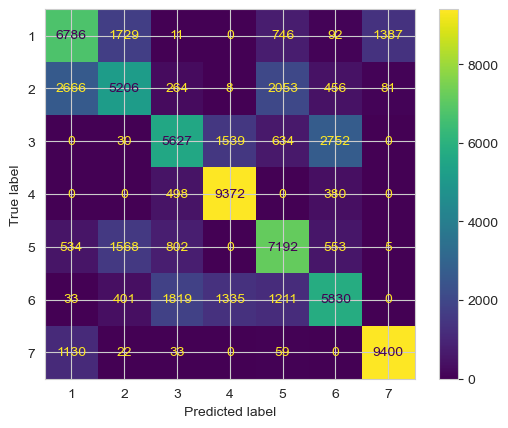

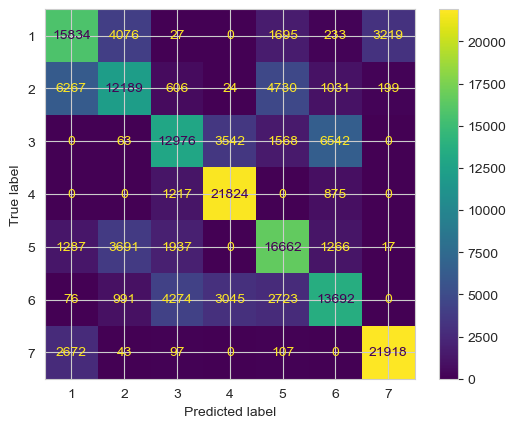

In [49]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(model_baggingSVC, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(model_baggingSVC, X_train_scaled, y_train);
plt.show()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_LSVC)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [50]:
from sklearn.metrics import f1_score, accuracy_score
scores = {}

In [51]:
y_test.shape, y_pred_test.shape

((74244,), (74244,))

In [52]:
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)
scores["model_LSVC"]={}
scores["model_LSVC"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_LSVC"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_LSVC"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_LSVC"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
scores


{'model_LSVC': {'f1_score_test': 0.6625942191088722,
  'f1_score_train': 0.6616825404885841,
  'accuracy_score_test': 0.6663703464253004,
  'accuracy_score_train': 0.6653447628943343}}

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247479 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Aspect                              247479 non-null  int64  
 1   Slope                               247479 non-null  int64  
 2   Hillshade_9am                       247479 non-null  int64  
 3   Hillshade_Noon                      247479 non-null  int64  
 4   Hillshade_3pm                       247479 non-null  int64  
 5   Horizontal_Distance_To_Fire_Points  247479 non-null  int64  
 6   Soil_Type_Cat                       247479 non-null  object 
 7   Wilderness_Area_Cat                 247479 non-null  object 
 8   hypo_distance                       247479 non-null  float64
 9   Average_Dist_Road_Hydro             247479 non-null  float64
 10  Average_Elevation_Hydro             247479 non-null  float64
 11  Cover_Type                

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
X = df.drop("Cover_Type", axis = 1)

y = df["Cover_Type"]

In [57]:
cat = X.select_dtypes("object").columns
cat

Index(['Soil_Type_Cat', 'Wilderness_Area_Cat'], dtype='object')

In [58]:
X[cat]

,Soil_Type_Cat,Wilderness_Area_Cat
0,10,3
1,38,1
2,38,1
3,13,3
4,31,3
...,...,...
249995,10,4
249996,13,3
249997,6,4
249998,0,3


In [59]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type_Cat,Wilderness_Area_Cat,hypo_distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,123,10,237,231,123,2113,2.0000000000,3.0000000000,217.3660507071,"1,228.5000000000","1,372.0000000000"
1,110,19,249,216,88,3960,32.0000000000,1.0000000000,139.8427688513,"1,934.0000000000","1,654.5000000000"
2,322,18,170,217,185,1330,32.0000000000,1.0000000000,361.2921255715,"2,357.5000000000","1,693.5000000000"
3,89,31,248,173,29,889,5.0000000000,3.0000000000,321.7530108639,795.0000000000,"1,511.0000000000"
4,93,12,239,221,110,945,25.0000000000,3.0000000000,520.5506699640,538.5000000000,"1,683.0000000000"


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247479 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Aspect                              247479 non-null  int64  
 1   Slope                               247479 non-null  int64  
 2   Hillshade_9am                       247479 non-null  int64  
 3   Hillshade_Noon                      247479 non-null  int64  
 4   Hillshade_3pm                       247479 non-null  int64  
 5   Horizontal_Distance_To_Fire_Points  247479 non-null  int64  
 6   Soil_Type_Cat                       247479 non-null  float64
 7   Wilderness_Area_Cat                 247479 non-null  float64
 8   hypo_distance                       247479 non-null  float64
 9   Average_Dist_Road_Hydro             247479 non-null  float64
 10  Average_Elevation_Hydro             247479 non-null  float64
dtypes: float64(5), int64(6)
me

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [63]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train , y_train)


DecisionTreeClassifier()

In [64]:
y_pred_test = model_Tree.predict(X_test)
y_pred_train = model_Tree.predict(X_train)
scores["model_Tree"]={}
scores["model_Tree"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)


In [65]:
scores["model_LSVC"], scores["model_Tree"],

({'f1_score_test': 0.6625942191088722,
  'f1_score_train': 0.6616825404885841,
  'accuracy_score_test': 0.6663703464253004,
  'accuracy_score_train': 0.6653447628943343},
 {'f1_score_test': 0.9274175005273255,
  'f1_score_train': 1.0,
  'accuracy_score_test': 0.927347664457734,
  'accuracy_score_train': 1.0})

In [67]:
pd.DataFrame(scores)[["model_LSVC","model_Tree"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6625942191,0.6616825405,0.6663703464,0.6653447629
model_Tree,0.9274175005,1.0000000000,0.9273476645,1.0000000000


In [72]:
from sklearn.metrics import confusion_matrix

In [88]:

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [91]:
eval_metric(model_Tree,X_train, y_train, X_test, y_test)

Test_Set
[[3106  445    5    0   23    5   82]
 [ 441 2871   50    0   81   55   17]
 [   3   38 3287   40   10  160    0]
 [   0    1   25 3368    0   16    0]
 [  11   50    7    0 3516    5    0]
 [   3   22  143   22    7 3297    0]
 [  26    4    0    0    1    0 3505]]
              precision    recall  f1-score   support

           1       0.87      0.85      0.86      3666
           2       0.84      0.82      0.83      3515
           3       0.93      0.93      0.93      3538
           4       0.98      0.99      0.98      3410
           5       0.97      0.98      0.97      3589
           6       0.93      0.94      0.94      3494
           7       0.97      0.99      0.98      3536

    accuracy                           0.93     24748
   macro avg       0.93      0.93      0.93     24748
weighted avg       0.93      0.93      0.93     24748


Train_Set
[[32169     0     0     0     0     0     0]
 [    0 32265     0     0     0     0     0]
 [    0     0 31735     0 

In [77]:
model = DecisionTreeClassifier(random_state=101)
from sklearn.model_selection import   cross_validate
scoress = cross_validate(model, X_train, y_train, scoring = ["accuracy", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scoress, index = range(1, 11))


In [78]:
df_scores.iloc[:,2:],df_scores.iloc[:,2:].mean()

(    test_accuracy  test_f1_macro
 1    0.9230941905   0.9231848017
 2    0.9238090962   0.9240087344
 3    0.9209356620   0.9210427107
 4    0.9232703273   0.9234735221
 5    0.9212050465   0.9214091899
 6    0.9217887128   0.9219673891
 7    0.9237193014   0.9238354441
 8    0.9230009428   0.9230799114
 9    0.9249764289   0.9252009288
 10   0.9227315584   0.9231192475,
 test_accuracy   0.9228531267
 test_f1_macro   0.9230321880
 dtype: float64)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
model = DecisionTreeClassifier()
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5]}
model_Tree_gs = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=5,
                          n_jobs = -1)
model_Tree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']},
             scoring='f1_macro')

In [82]:
model_Tree_gs.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [83]:
model_Tree_gs.best_score_


0.9181972808133823

In [84]:
model_Tree_tuned = DecisionTreeClassifier(max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split = 2, splitter='best')
model_Tree_tuned.fit(X_train , y_train)

DecisionTreeClassifier()

In [85]:
y_pred_test = model_Tree_tuned.predict(X_test)
y_pred_train = model_Tree_tuned.predict(X_train)
scores["model_Tree_tuned"]={}
scores["model_Tree_tuned"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_tuned"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_tuned"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_tuned"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
# 

In [86]:
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned
f1_score_test,0.6625942191,0.9274175005,0.9278948396
f1_score_train,0.6616825405,1.0000000000,1.0000000000
accuracy_score_test,0.6663703464,0.9273476645,0.9278325521
accuracy_score_train,0.6653447629,1.0000000000,1.0000000000


In [92]:
eval_metric(model_Tree_tuned,X_train, y_train, X_test, y_test)

Test_Set
[[3114  444    5    0   21    7   75]
 [ 438 2862   52    0   94   53   16]
 [   3   38 3288   35   11  163    0]
 [   0    0   25 3371    0   14    0]
 [  10   43    9    0 3522    5    0]
 [   1   27  132   20    7 3307    0]
 [  32    5    0    0    1    0 3498]]
              precision    recall  f1-score   support

           1       0.87      0.85      0.86      3666
           2       0.84      0.81      0.83      3515
           3       0.94      0.93      0.93      3538
           4       0.98      0.99      0.99      3410
           5       0.96      0.98      0.97      3589
           6       0.93      0.95      0.94      3494
           7       0.97      0.99      0.98      3536

    accuracy                           0.93     24748
   macro avg       0.93      0.93      0.93     24748
weighted avg       0.93      0.93      0.93     24748


Train_Set
[[32169     0     0     0     0     0     0]
 [    0 32265     0     0     0     0     0]
 [    0     0 31735     0 

In [201]:
model_Tree_bagg = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=20)

model_Tree_bagg.fit(X_train , y_train)
y_pred_test = model_Tree_bagg.predict(X_test)
y_pred_train = model_Tree_bagg.predict(X_train)
print(
    "f1_train:", f1_score(y_train,y_pred_train,average="macro"),
    "f1_test:", f1_score(y_test,y_pred_test,average="macro"),
    "\n",
    "Accuracy_train:", accuracy_score(y_train,y_pred_train),
    "Accuracy_test:", accuracy_score(y_test,y_pred_test)    
      )

f1_train: 0.9289242685022466 f1_test: 0.90870976799194 
 Accuracy_train: 0.9298914285714286 Accuracy_test: 0.9101333333333333


In [219]:
scores["model_Tree_bagg"]={}
scores["model_Tree_bagg"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_bagg"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_bagg"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_bagg"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6654127086,0.6687247404,0.6708133333,0.6739885714
model_Tree,0.9326116249,1.0000000000,0.9329466667,1.0000000000
model_Tree_tuned,0.9327584202,1.0000000000,0.9330800000,1.0000000000
model_Tree_bagg,0.9087097680,0.9289242685,0.9101333333,0.9298914286


### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [216]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100)

model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [220]:
y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg","model_RF"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6654127086,0.6687247404,0.6708133333,0.6739885714
model_Tree,0.9326116249,1.0000000000,0.9329466667,1.0000000000
model_Tree_tuned,0.9327584202,1.0000000000,0.9330800000,1.0000000000
model_Tree_bagg,0.9087097680,0.9289242685,0.9101333333,0.9298914286
model_RF,0.9596965476,1.0000000000,0.9600000000,1.0000000000


In [ ]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="f1_macro",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

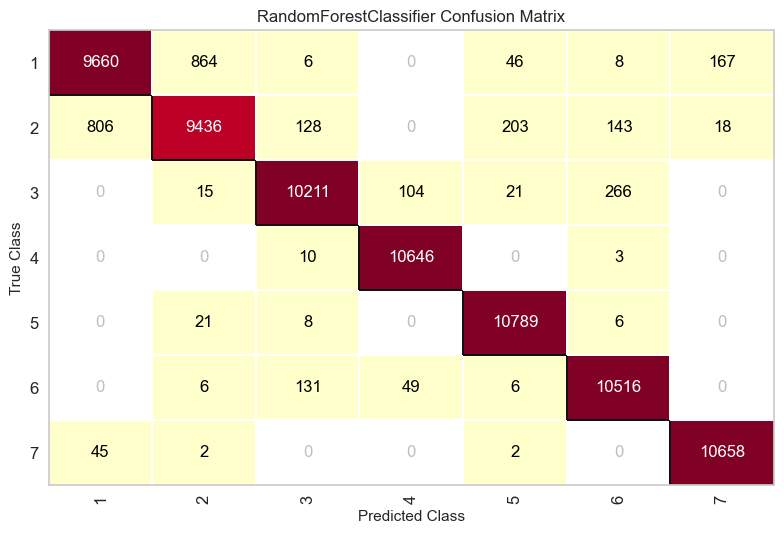

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.90      0.91     10751
           2       0.91      0.88      0.90     10734
           3       0.97      0.96      0.97     10617
           4       0.99      1.00      0.99     10659
           5       0.97      1.00      0.99     10824
           6       0.96      0.98      0.97     10708
           7       0.98      1.00      0.99     10707

    accuracy                           0.96     75000
   macro avg       0.96      0.96      0.96     75000
weighted avg       0.96      0.96      0.96     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [104]:
eval_model(model_RF,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [96]:
model = model_RF
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [102]:
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned,model_RF
f1_score_test,0.67,0.93,0.93,0.96
f1_score_train,0.67,1.00,1.00,1.00
accuracy_score_test,0.67,0.93,0.93,0.96
accuracy_score_train,0.67,1.00,1.00,1.00


### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [105]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier().fit(X_train , y_train)
y_pred_test = model_XGB.predict(X_test)
y_pred_train = model_XGB.predict(X_train)
scores["model_XGB"]={}
scores["model_XGB"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_XGB"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_XGB"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_XGB"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned,model_RF,model_XGB
f1_score_test,0.67,0.93,0.93,0.96,0.92
f1_score_train,0.67,1.00,1.00,1.00,0.94
accuracy_score_test,0.67,0.93,0.93,0.96,0.92
accuracy_score_train,0.67,1.00,1.00,1.00,0.94


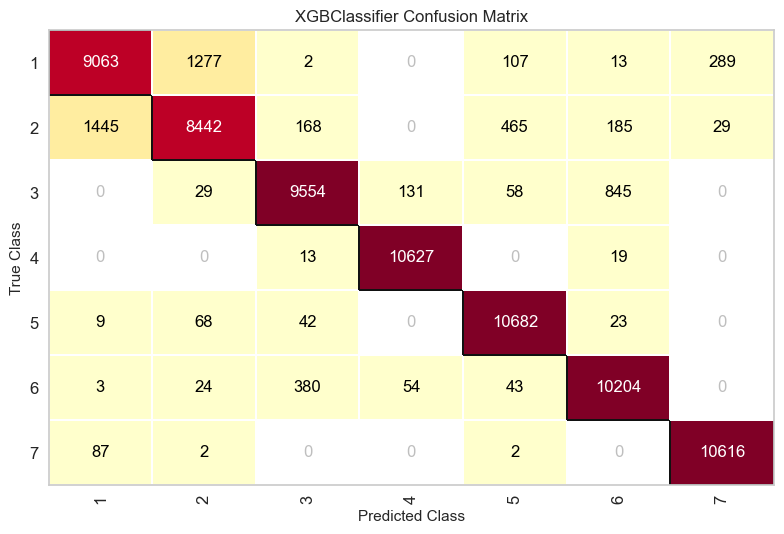

TEST REPORT
              precision    recall  f1-score   support

           1       0.85      0.84      0.85     10751
           2       0.86      0.79      0.82     10734
           3       0.94      0.90      0.92     10617
           4       0.98      1.00      0.99     10659
           5       0.94      0.99      0.96     10824
           6       0.90      0.95      0.93     10708
           7       0.97      0.99      0.98     10707

    accuracy                           0.92     75000
   macro avg       0.92      0.92      0.92     75000
weighted avg       0.92      0.92      0.92     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.88      0.88      0.88     25085
           2       0.90      0.83      0.86     25046
           3       0.96      0.92      0.94     24774
           4       0.99      1.00      1.00     24870
           5       0.95      0.99      0.9

In [106]:
eval_model(model_XGB,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [136]:
fi = pd.DataFrame(model_XGB.feature_importances_, index=list(X_train.columns), columns=["fi"])
fi = fi.sort_values("fi",ascending=False)
fi

,fi
Soil_Type_10,0.09
Elevation,0.08
Wilderness_Area_4,0.08
Soil_Type_12,0.08
Soil_Type_30,0.07
Soil_Type_3,0.06
Soil_Type_39,0.04
Soil_Type_4,0.04
Soil_Type_13,0.03
Wilderness_Area_1,0.03


### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

<AxesSubplot:>

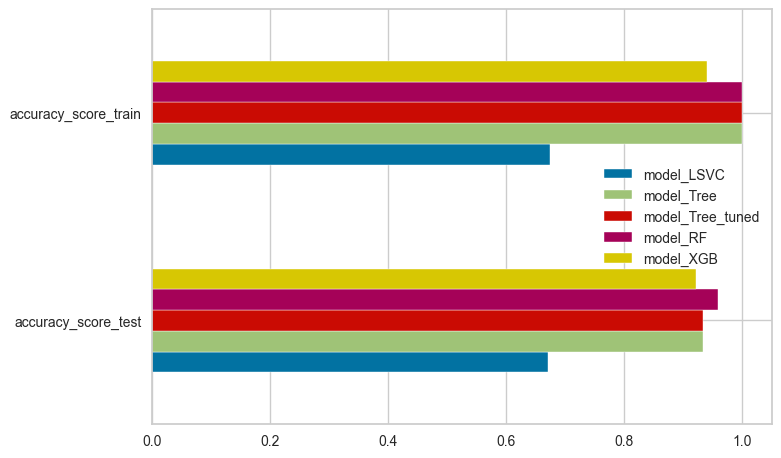

In [142]:
comp = pd.DataFrame(scores)
comp.loc[["accuracy_score_test","accuracy_score_train"]].plot.barh()

# F1 Score Comparison

<AxesSubplot:>

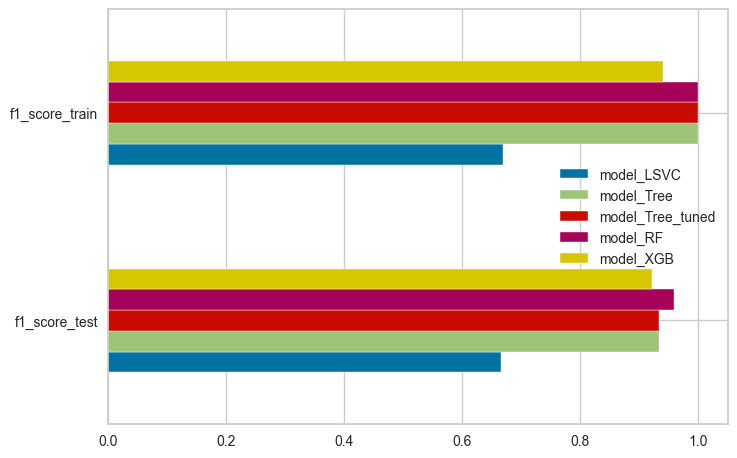

In [143]:
comp.loc[["f1_score_test","f1_score_train"]].plot.barh()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___